In [1]:
import warnings; warnings.filterwarnings("ignore")

</br>

* **data processing (Merge all data)**

In [2]:
import numpy as np

X_kmer = np.load('K-mer.npy')
X_revk = np.load('rev-k-mer.npy')
X_gapk = np.load('gapped_k_mer.npy')

In [3]:
print(X_kmer.shape)
print(X_revk.shape)
print(X_gapk.shape)

(1081, 340)
(1081, 340)
(1081, 80)


In [4]:
Y  = [1 for i in range(490)]
Y += [0 for i in range(591)]
Y = np.array(Y)
print(Y.shape)

(1081,)


In [5]:
X = np.concatenate((X_kmer,X_revk, X_gapk),axis=1)

In [6]:
X.shape

(1081, 760)

</br>

* **Shuffle**

In [7]:
from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state=0)

print(X.shape)
print(Y.shape)

(1081, 760)
(1081,)


In [8]:
X.shape

(1081, 760)

In [9]:
X = X.reshape(-1, 760, 1)
X.shape

(1081, 760, 1)

In [10]:
X[0].shape

(760, 1)

In [11]:
# Deep Neural Networks:
import tensorflow as tf; print('We\'re using TF-{}.'.format(tf.__version__))
from tensorflow.keras.layers import (Input, Dense, Dropout, Flatten, BatchNormalization,
                                     Conv1D, Conv2D, MaxPooling1D, MaxPooling2D,
                                     LSTM, GRU, Embedding, Bidirectional, Concatenate)
from tensorflow.keras.regularizers import (l1, l2, l1_l2)
from tensorflow.keras.optimizers import (RMSprop, Adam, SGD)
from tensorflow.keras.models import (Sequential, Model)

# Core:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interp
import matplotlib.patches as patches

# Performance:
from sklearn.metrics import (confusion_matrix, classification_report, matthews_corrcoef, precision_score, roc_curve, auc)
from sklearn.model_selection import (StratifiedKFold, KFold, train_test_split)

#Utilities:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical as labelEncoding   
from tensorflow.keras.utils import plot_model                        
#end-import

In [14]:
Y = labelEncoding(Y, dtype=int)
Y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [23]:
def lossPlot(results):
    plt.title(label='Loss: Training and Validation')
    plt.plot(results.history['loss'], label='Training Loss')
    plt.plot(results.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def accuracyPlot(results):
    plt.title(label='Accuracy: Training and Validation')
    plt.plot(results.history['accuracy'], label='Training Accuracy')
    plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


def rocPlot(TPR, meanFPR):
    plt.plot([0,1], [0,1],linestyle = '--',lw = 2,color = 'black')
    meanTPR = np.mean(TPR, axis=0)
    meanAUC = auc(meanFPR, meanTPR)
    plt.plot(meanFPR, meanTPR, color='blue',
            label=r'Mean ROC (AUC = %0.2f )' % (meanAUC),lw=2, alpha=1)

    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic Curve (ROC Curve)')
    plt.legend(loc="lower right")
    plt.savefig('ROC-240.png')
    plt.show()


In [24]:
def Network():
    input1 = Input(shape=(760, 1))

 
    x = Conv1D(filters=16, kernel_size=4, padding='same', activation='relu', kernel_regularizer=l2(l=0.01))(input1)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.80)(x)
    
    x = Flatten()(x)
        
    x = Dense(units=16, activation='relu', kernel_regularizer=l2(l=0.01))(x)
    x = Dropout(rate=0.80)(x)
    x = Dense(units=8, activation='relu', kernel_regularizer=l2(l=0.01))(x)
    o = Dense(units=2, activation='softmax')(x)

    return Model(inputs=[input1], outputs=[o])


Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 760, 1)]          0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 760, 16)           80        
_________________________________________________________________
batch_normalization_13 (Batc (None, 760, 16)           64        
_________________________________________________________________
dropout_17 (Dropout)         (None, 760, 16)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 12160)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 16)                194576    
_________________________________________________________________
dropout_18 (Dropout)         (None, 16)               

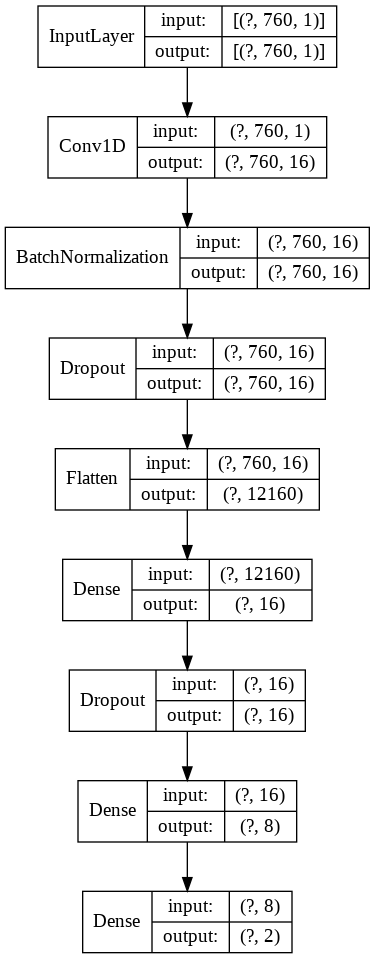

In [25]:
model = Network()
model.summary()
plot_model(model, to_file='model-Nasif.png', show_shapes=True, show_layer_names=False, expand_nested=True)

In [26]:
X.shape

(1081, 760, 1)

Epoch 1/100
108/108 [==============================] - 1s 5ms/step - loss: 1.1540 - accuracy: 0.5069 - val_loss: 0.9552 - val_accuracy: 0.5115
Epoch 2/100
108/108 [==============================] - 0s 3ms/step - loss: 0.9639 - accuracy: 0.4850 - val_loss: 0.9320 - val_accuracy: 0.5207
Epoch 3/100
108/108 [==============================] - 0s 3ms/step - loss: 0.9179 - accuracy: 0.5567 - val_loss: 0.9055 - val_accuracy: 0.5207
Epoch 4/100
108/108 [==============================] - 0s 4ms/step - loss: 0.8941 - accuracy: 0.5602 - val_loss: 0.8843 - val_accuracy: 0.5438
Epoch 5/100
108/108 [==============================] - 0s 3ms/step - loss: 0.8968 - accuracy: 0.5602 - val_loss: 0.8777 - val_accuracy: 0.5115
Epoch 6/100
108/108 [==============================] - 0s 3ms/step - loss: 0.8764 - accuracy: 0.5590 - val_loss: 0.8597 - val_accuracy: 0.5161
Epoch 7/100
108/108 [==============================] - 0s 3ms/step - loss: 0.8434 - accuracy: 0.5683 - val_loss: 0.8368 - val_accuracy: 0.6037

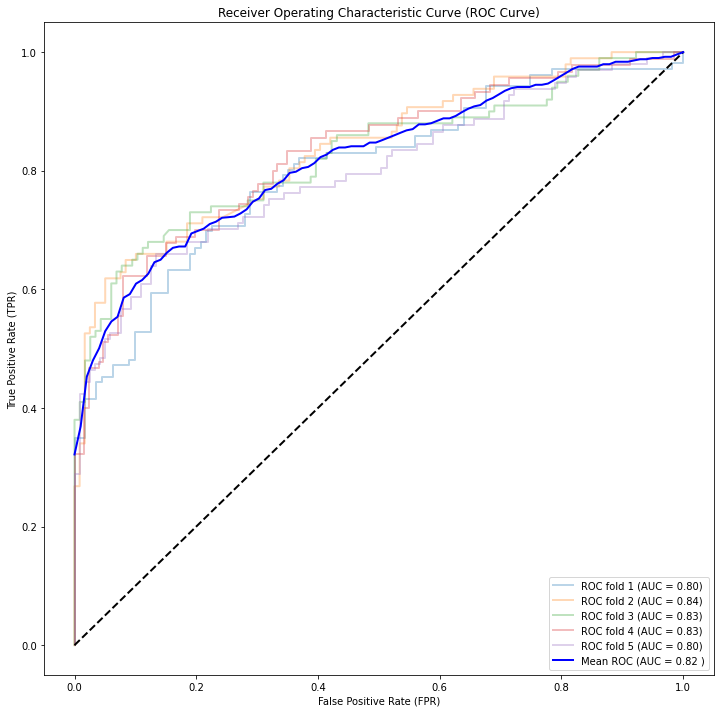

Accuracy [Each Fold]: [0.7281106114387512, 0.7870370149612427, 0.7870370149612427, 0.7824074029922485, 0.7453703880310059]
Accuracy: 0.77
Sensitivity: 0.5858
Specificity: 0.9149
MCC: 0.5398
Precision: 0.8555


In [36]:
setEpochNumber     = 100     # Performed-well in epoch 100
setBatchSizeNumber = 8

fold = 5
cv = KFold(n_splits=fold, shuffle=True, random_state=101)

Accuracy = []
Sensitivity = []
Specificity = []
Precision = []
MCC = []

# ROC Curve:
fig = plt.figure(figsize=[12,12])

TPR = []
meanFPR = np.linspace(0, 1, 100)

i = 1
plotCount = 1


for train, test in cv.split(Y):

    # Compile Model:
    model = Network()
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


    # Run Model:
    results = model.fit(x=X[train,:,:],
                        y=Y[train,:],
                        validation_data=(X[test,:,:], Y[test,:]),
                        batch_size=setBatchSizeNumber, epochs=setEpochNumber,
                        callbacks = [],
              )

    accuracy = model.evaluate(x=X[test,:,:], y=Y[test,:], batch_size=setBatchSizeNumber)
    Accuracy.append(accuracy[1])

    # Performance Metices:
    Yactual = Y[test,:].argmax(axis=1)
    Yp = model.predict(X[test,:,:])
    v = Yp
    Yp = Yp.argmax(axis=1)

    CM = confusion_matrix(y_pred=Yp, y_true=Yactual)
    TN, FP, FN, TP = CM.ravel()

    MCC.append(matthews_corrcoef(y_true=Yactual, y_pred=Yp))
    Sensitivity.append( TP / (TP + FN) )
    Specificity.append( TN / (TN + FP) )
    Precision.append(precision_score(y_true=Yactual, y_pred=Yp))
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(Yactual, v[:,1])
    TPR.append(interp(meanFPR, fpr, tpr))
    rocauc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, rocauc))
    i= i+1
    
    # Performance Plot
    print('____________________________________________________')
    print('Fold\'s Accuracy-{}: {:.2f}'.format(plotCount, accuracy[1]*100.0))
    # lossPlot(results)
    # accuracyPlot(results)
    plotCount += 1
    print('____________________________________________________')



rocPlot(TPR, meanFPR)

print('Accuracy [Each Fold]: {}'.format(Accuracy))
print('Accuracy: {:.2f}'.format(np.sum(Accuracy)/fold))
print('Sensitivity: {0:.4f}'.format(np.sum(Sensitivity)/fold))
print('Specificity: {0:.4f}'.format(np.sum(Specificity)/fold))
print('MCC: {0:.4f}'.format(np.sum(MCC)/fold))
print('Precision: {0:.4f}'.format(np.sum(Precision)/fold))